In [1]:
!nvidia-smi

Thu May  8 19:10:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
print(torch.cuda.is_available())

True


In [3]:
!wget http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip
!unzip -q ut-zap50k-images.zip

--2025-05-08 19:11:14--  http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip
Resolving vision.cs.utexas.edu (vision.cs.utexas.edu)... 128.83.130.185
Connecting to vision.cs.utexas.edu (vision.cs.utexas.edu)|128.83.130.185|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip [following]
--2025-05-08 19:11:14--  https://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip
Connecting to vision.cs.utexas.edu (vision.cs.utexas.edu)|128.83.130.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305323328 (291M) [application/zip]
Saving to: ‘ut-zap50k-images.zip’

ut-zap50k-images.zi 100%[===================>] 291.18M  76.6MB/s    in 4.1s    

2025-05-08 19:11:18 (71.2 MB/s) - ‘ut-zap50k-images.zip’ saved [305323328/305323328]



In [6]:
import os
import subprocess

# Download the dataset
if not os.path.exists('ut-zap50k-images.zip'):
    print("Downloading UT-Zap50K dataset...")
    subprocess.run(['wget', 'http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip'])
else:
    print("Dataset zip already exists.")

# Extract the dataset
if not os.path.exists('ut-zap50k-images'):
    print("Extracting dataset...")
    subprocess.run(['unzip', '-q', 'ut-zap50k-images.zip'])
else:
    print("Dataset already extracted.")

# Verify folder structure
if os.path.exists('ut-zap50k-images/Sneakers'):
    print("Sneakers folder found!")
else:
    print("Error: Sneakers folder not found. Listing available folders...")
    print(os.listdir('ut-zap50k-images'))

Dataset zip already exists.
Dataset already extracted.
Error: Sneakers folder not found. Listing available folders...
['Boots', 'Slippers', 'Shoes', 'Sandals']


In [7]:
import os
shoes_dir = 'ut-zap50k-images/Shoes'
if os.path.exists(shoes_dir):
    print(f"Contents of {shoes_dir}:")
    print(os.listdir(shoes_dir))
else:
    print(f"Error: {shoes_dir} not found.")

Contents of ut-zap50k-images/Shoes:
['Sneakers and Athletic Shoes', 'Crib Shoes', 'Heels', 'Boat Shoes', 'Prewalker', 'Firstwalker', 'Loafers', 'Clogs and Mules', 'Oxfords', 'Flats']


In [8]:
import os
import shutil

os.makedirs('dataset/real_images', exist_ok=True)
source_dir = 'ut-zap50k-images/Shoes/Sneakers'  # Updated path
try:
    files = os.listdir(source_dir)[:1000]  # Select 1,000 images
    for f in files:
        shutil.copy(os.path.join(source_dir, f), 'dataset/real_images')
    print(f"Copied {len(files)} images to dataset/real_images")
except FileNotFoundError:
    print(f"Error: Directory {source_dir} not found. Please check the folder structure.")

Error: Directory ut-zap50k-images/Shoes/Sneakers not found. Please check the folder structure.


In [9]:
import os
boots_dir = 'ut-zap50k-images/Boots'
if os.path.exists(boots_dir):
    print(f"Contents of {boots_dir}:")
    contents = os.listdir(boots_dir)
    print(contents[:10])  # Show first 10 items
      # Check if contents are folders or images
    if contents and os.path.isdir(os.path.join(boots_dir, contents[0])):
        print("Contents are subfolders. Listing first subfolder's contents:")
        print(os.listdir(os.path.join(boots_dir, contents[0]))[:10])  # First 10 items
    else:
        print("Contents are likely image files.")
else:
    print(f"Error: {boots_dir} not found.")

Contents of ut-zap50k-images/Boots:
['Prewalker Boots', 'Ankle', 'Mid-Calf', 'Knee High', 'Over the Knee']
Contents are subfolders. Listing first subfolder's contents:
['Kid Express', 'Timberland Kids']


In [10]:
import os
ankle_dir = 'ut-zap50k-images/Boots/Ankle'
if os.path.exists(ankle_dir):
    print(f"Contents of {ankle_dir}:")
    contents = os.listdir(ankle_dir)
    print(contents[:10])  # Show first 10 items
    # Check if contents are folders or images
    if contents and os.path.isdir(os.path.join(ankle_dir, contents[0])):
        print("Contents are subfolders. Listing first subfolder's contents:")
        print(os.listdir(os.path.join(ankle_dir, contents[0]))[:10])  # First 10 items
    else:
        print("Contents are likely image files.")
else:
    print(f"Error: {ankle_dir} not found.")

Contents of ut-zap50k-images/Boots/Ankle:
['Munro American', 'Zigi', 'Kid Express', 'Enzo Kids', 'Helle Comfort', 'Nina', 'Crocs Kids', 'Black Rooster', 'Patagonia', 'Blundstone']
Contents are subfolders. Listing first subfolder's contents:
['7684261.72.jpg', '7684280.2007.jpg', '7684261.84.jpg', '7684303.72.jpg', '8030447.216.jpg', '7684303.310.jpg', '8030447.72.jpg', '7684303.80544.jpg', '7851902.311759.jpg']


In [11]:
import os
import shutil

os.makedirs('dataset/real_images', exist_ok=True)
source_dir = 'ut-zap50k-images/Boots/Ankle'
image_count = 0
max_images = 1000

try:
    # Iterate through subfolders in Boots/Ankle
    for subfolder in os.listdir(source_dir):
        subfolder_path = os.path.join(source_dir, subfolder)
        if os.path.isdir(subfolder_path):
            # Copy images from each subfolder
            for img_name in os.listdir(subfolder_path):
                if img_name.endswith(('.jpg', '.jpeg', '.png')):
                    shutil.copy(os.path.join(subfolder_path, img_name), 'dataset/real_images')
                    image_count += 1
                    if image_count >= max_images:
                        break
            if image_count >= max_images:
                break
    print(f"Copied {image_count} images to dataset/real_images")
except Exception as e:
    print(f"Error: {str(e)}")

Copied 1000 images to dataset/real_images


In [12]:
import cv2
import os

os.makedirs('dataset/sketches', exist_ok=True)
image_dir = 'dataset/real_images'
sketch_dir = 'dataset/sketches'
for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    img = cv2.imread(img_path, 0)  # Grayscale
    edges = cv2.Canny(img, 100, 200)  # Edge detection
    cv2.imwrite(os.path.join(sketch_dir, img_name), edges)
print(f"Generated {len(os.listdir(sketch_dir))} sketches")

Generated 1000 sketches


In [13]:
!pip install opencv-python pillow


Epoch [1/20] Batch [0/63] D Loss: 0.6788 G Loss: 82.3063
Epoch [1/20] Batch [50/63] D Loss: 0.5255 G Loss: 14.5964
Epoch [2/20] Batch [0/63] D Loss: 0.6506 G Loss: 13.4153
Epoch [2/20] Batch [50/63] D Loss: 0.4796 G Loss: 11.7871
Epoch [3/20] Batch [0/63] D Loss: 0.4008 G Loss: 11.0889
Epoch [3/20] Batch [50/63] D Loss: 0.5442 G Loss: 9.4062
Epoch [4/20] Batch [0/63] D Loss: 0.5838 G Loss: 12.7033
Epoch [4/20] Batch [50/63] D Loss: 0.6232 G Loss: 9.8415
Epoch [5/20] Batch [0/63] D Loss: 0.5571 G Loss: 12.4139
Epoch [5/20] Batch [50/63] D Loss: 0.6062 G Loss: 10.4310
Epoch [6/20] Batch [0/63] D Loss: 0.6583 G Loss: 10.9509
Epoch [6/20] Batch [50/63] D Loss: 0.6500 G Loss: 10.2897
Epoch [7/20] Batch [0/63] D Loss: 0.5133 G Loss: 12.4941
Epoch [7/20] Batch [50/63] D Loss: 0.5186 G Loss: 10.9751
Epoch [8/20] Batch [0/63] D Loss: 0.6851 G Loss: 8.8387
Epoch [8/20] Batch [50/63] D Loss: 0.5559 G Loss: 10.6330
Epoch [9/20] Batch [0/63] D Loss: 0.4997 G Loss: 9.3306
Epoch [9/20] Batch [50/63] 

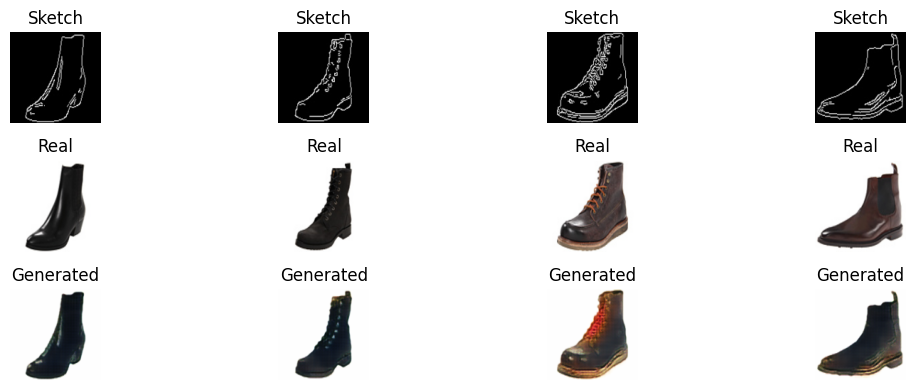

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define Generator (U-Net-like architecture)
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        def conv_block(in_channels, out_channels, kernel_size=3, stride=1, padding=1):
            return nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True)
            )
        def upconv_block(in_channels, out_channels):
            return nn.Sequential(
                nn.ConvTranspose2d(in_channels, out_channels, kernel_size=4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True)
            )

        # Encoder
        self.enc1 = conv_block(1, 64)  # Input: 1 channel (grayscale sketch)
        self.enc2 = conv_block(64, 128)
        self.enc3 = conv_block(128, 256)
        self.pool = nn.MaxPool2d(2, 2)

        # Bottleneck
        self.bottleneck = conv_block(256, 512)

        # Decoder
        self.up3 = upconv_block(512, 256)
        self.dec3 = conv_block(512, 256)
        self.up2 = upconv_block(256, 128)
        self.dec2 = conv_block(256, 128)
        self.up1 = upconv_block(128, 64)
        self.dec1 = conv_block(128, 64)

        # Output layer
        self.out = nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool(e1))
        e3 = self.enc3(self.pool(e2))

        # Bottleneck
        b = self.bottleneck(self.pool(e3))

        # Decoder with skip connections
        d3 = self.up3(b)
        d3 = torch.cat([d3, e3], dim=1)
        d3 = self.dec3(d3)

        d2 = self.up2(d3)
        d2 = torch.cat([d2, e2], dim=1)
        d2 = self.dec2(d2)

        d1 = self.up1(d2)
        d1 = torch.cat([d1, e1], dim=1)
        d1 = self.dec1(d1)

        out = self.out(d1)
        return self.tanh(out)

# Define Discriminator (Fixed)
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, stride=2, padding=1),  # 128x128 -> 64x64
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),  # 64x64 -> 32x32
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, stride=2, padding=1),  # 32x32 -> 16x16
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 1, 4, stride=2, padding=0),  # 16x16 -> 7x7
            nn.AdaptiveAvgPool2d(1),  # 7x7 -> 1x1
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x).view(-1, 1)

# Custom Dataset
class SketchImageDataset(Dataset):
    def __init__(self, sketch_dir, image_dir, transform=None):
        self.sketch_dir = sketch_dir
        self.image_dir = image_dir
        self.transform = transform
        self.sketches = sorted(os.listdir(sketch_dir))
        self.images = sorted(os.listdir(image_dir))

    def __len__(self):
        return len(self.sketches)

    def __getitem__(self, idx):
        sketch_path = os.path.join(self.sketch_dir, self.sketches[idx])
        image_path = os.path.join(self.image_dir, self.images[idx])

        sketch = Image.open(sketch_path).convert('L')  # Grayscale sketch
        image = Image.open(image_path).convert('RGB')  # RGB real image

        if self.transform:
            sketch = self.transform(sketch)
            image = self.transform(image)

        return sketch, image

# Training function
def train_gan(generator, discriminator, dataloader, device, num_epochs=5):
    criterion_gan = nn.BCELoss()
    criterion_l1 = nn.L1Loss()
    optimizer_g = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
    optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

    for epoch in range(num_epochs):
        for i, (sketches, real_images) in enumerate(dataloader):
            sketches, real_images = sketches.to(device), real_images.to(device)
            batch_size = sketches.size(0)

            # Labels
            real_label = torch.ones(batch_size, 1).to(device)
            fake_label = torch.zeros(batch_size, 1).to(device)

            # Train Discriminator
            optimizer_d.zero_grad()
            real_output = discriminator(real_images)
            d_loss_real = criterion_gan(real_output, real_label)

            fake_images = generator(sketches)
            fake_output = discriminator(fake_images.detach())
            d_loss_fake = criterion_gan(fake_output, fake_label)

            d_loss = (d_loss_real + d_loss_fake) / 2
            d_loss.backward()
            optimizer_d.step()

            # Train Generator
            optimizer_g.zero_grad()
            fake_output = discriminator(fake_images)
            g_loss_gan = criterion_gan(fake_output, real_label)
            g_loss_l1 = criterion_l1(fake_images, real_images) * 100.0  # L1 weight
            g_loss = g_loss_gan + g_loss_l1
            g_loss.backward()
            optimizer_g.step()

            if i % 50 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}] Batch [{i}/{len(dataloader)}] '
                      f'D Loss: {d_loss.item():.4f} G Loss: {g_loss.item():.4f}')

        # Save model checkpoint
        torch.save(generator.state_dict(), f'generator_epoch_{epoch+1}.pth')
        torch.save(discriminator.state_dict(), f'discriminator_epoch_{epoch+1}.pth')

# Visualize generated images
def visualize_results(generator, dataloader, device, num_samples=4):
    generator.eval()
    with torch.no_grad():
        sketches, real_images = next(iter(dataloader))
        sketches, real_images = sketches[:num_samples].to(device), real_images[:num_samples]
        generated_images = generator(sketches)

        # Denormalize for visualization
        sketches = sketches.cpu() * 0.5 + 0.5
        real_images = real_images.cpu() * 0.5 + 0.5
        generated_images = generated_images.cpu() * 0.5 + 0.5

        plt.figure(figsize=(12, 4))
        for i in range(num_samples):
            # Sketch
            plt.subplot(3, num_samples, i+1)
            plt.imshow(sketches[i].squeeze(), cmap='gray')
            plt.title('Sketch')
            plt.axis('off')
            # Real Image
            plt.subplot(3, num_samples, i+1+num_samples)
            plt.imshow(real_images[i].permute(1, 2, 0))
            plt.title('Real')
            plt.axis('off')
            # Generated Image
            plt.subplot(3, num_samples, i+1+2*num_samples)
            plt.imshow(generated_images[i].permute(1, 2, 0))
            plt.title('Generated')
            plt.axis('off')
        plt.tight_layout()
        plt.savefig('results.png')
        plt.show()

# Main execution
if __name__ == '__main__':
    # Hyperparameters
    batch_size = 16
    image_size = 128
    num_epochs = 20
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Data transforms
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])  # For sketches and images
    ])

    # Dataset
    dataset = SketchImageDataset(
        sketch_dir='dataset/sketches',
        image_dir='dataset/real_images',
        transform=transform
    )
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Initialize models
    generator = Generator().to(device)
    discriminator = Discriminator().to(device)

    # Train
    train_gan(generator, discriminator, dataloader, device, num_epochs)

    # Visualize results
    visualize_results(generator, dataloader, device)

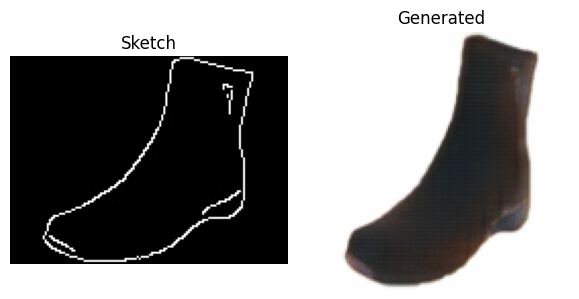

In [26]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch

# Ensure device is set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the trained generator
generator = Generator().to(device)
generator.load_state_dict(torch.load('generator_epoch_5.pth'))
generator.eval()

# Load a test sketch
sketch_path = 'dataset/sketches/7684261.84.jpg'  # First image from Munro American
sketch = Image.open(sketch_path).convert('L')
sketch_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
sketch_tensor = sketch_transform(sketch).unsqueeze(0).to(device)

# Generate image
with torch.no_grad():
    generated_image = generator(sketch_tensor)
    generated_image = generated_image.cpu() * 0.5 + 0.5  # Denormalize

# Visualize
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(sketch, cmap='gray')
plt.title('Sketch')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(generated_image[0].permute(1, 2, 0))
plt.title('Generated')
plt.axis('off')
plt.tight_layout()
plt.savefig('test_result.png')
plt.show()

In [27]:
from google.colab import files

# Download model checkpoints
files.download('generator_epoch_5.pth')
files.download('discriminator_epoch_5.pth')

# Download visualization images
files.download('results.png')  # From Step 4 (4 samples)
files.download('test_result.png')  # From Step 5 (single test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>